In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from mle_toolbox.utils import (hyper_log_to_df,
                               plot_1D_bar, plot_1D_line,
                               visualize_1D_bar, visualize_1D_line)
import numpy as np

# Speed Comparisons for Different Devices

In [2]:
cpu_speeds = np.load("../benchmarks/results/cpu_speed_jit.npy").squeeze()
gpu_tesla_speeds = np.load("../benchmarks/results/gpu_tesla_k40_speed_jit.npy").squeeze()
gpu_2080ti_speeds = np.load("../benchmarks/results/gpu_rtx2080ti_speed_no_jit.npy").squeeze()
speeds = np.stack([cpu_speeds[1], gpu_tesla_speeds[1], gpu_2080ti_speeds[1]])
jit = np.stack([cpu_speeds[0], gpu_tesla_speeds[0], gpu_2080ti_speeds[0]])

# rows: network sizes, cols: population sizes
population_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# network_sizes = [16, 48, 80, 112, 144]
network_sizes = [48]
speeds.shape

(3, 10)

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdaf5e7780>)

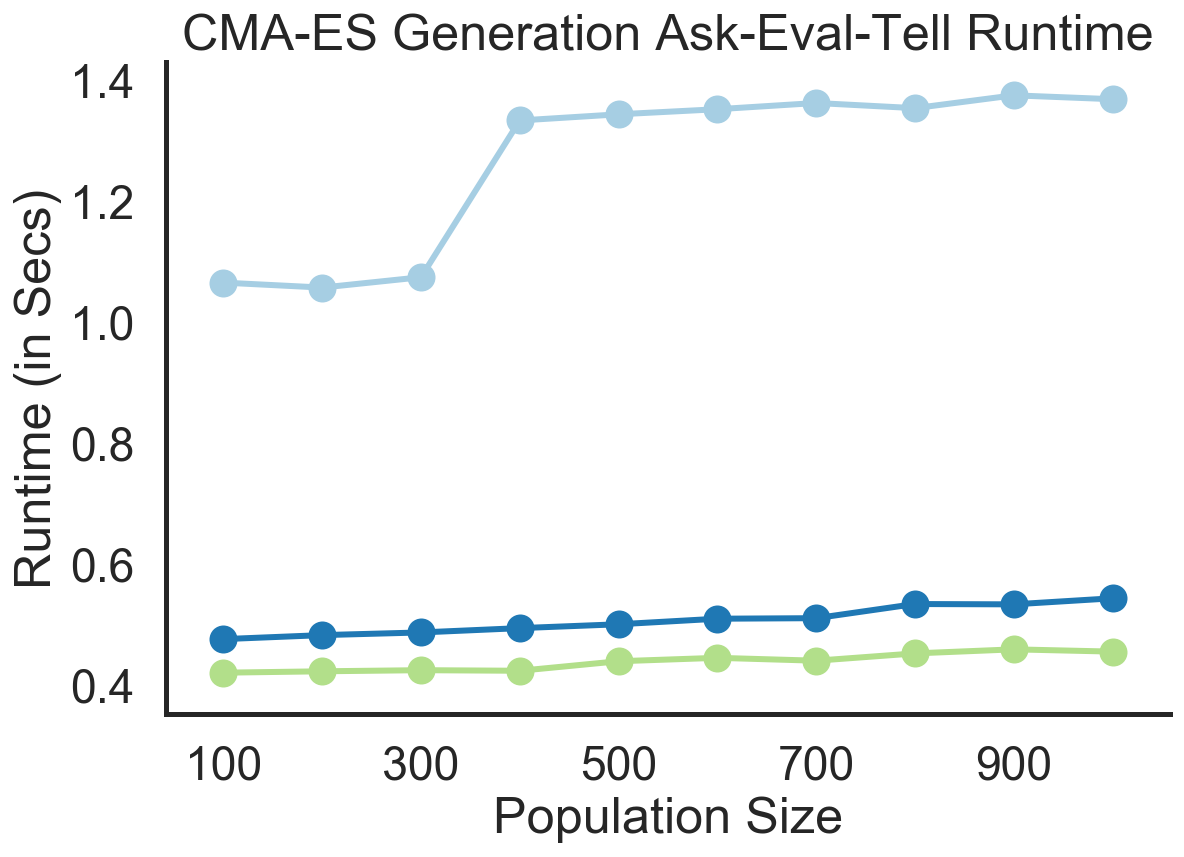

In [3]:
plot_1D_line(population_sizes, speeds,
             plot_title="CMA-ES Generation Ask-Eval-Tell Runtime",
             xy_labels=["Population Size", "Runtime (in Secs)"],
             every_nth_tick=2)

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdaa116128>)

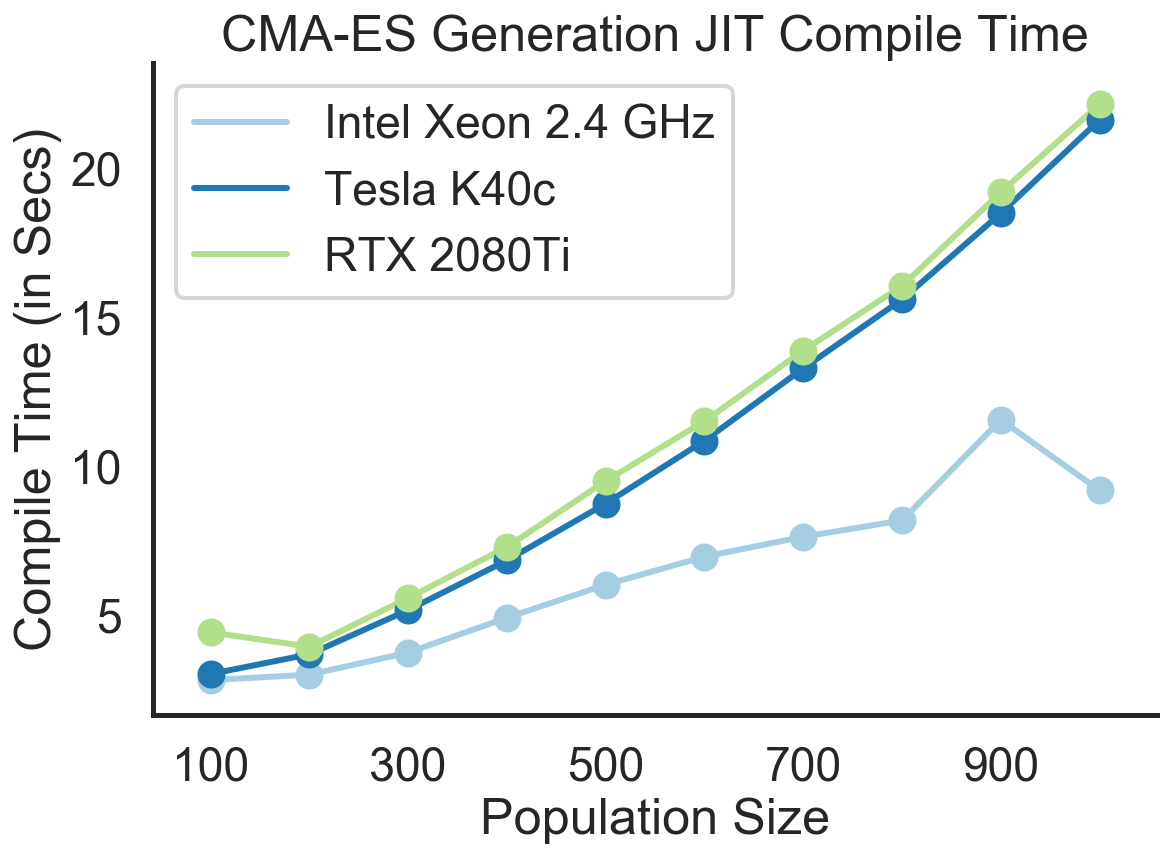

In [4]:
plot_1D_line(population_sizes, jit,
             plot_title="CMA-ES Generation JIT Compile Time",
             xy_labels=["Population Size", "Compile Time (in Secs)"],
             labels=["Intel Xeon 2.4 GHz", "Tesla K40c", "RTX 2080Ti"],
             every_nth_tick=2)

# Hyperparameter Comparison for Pendulum CMA-ES

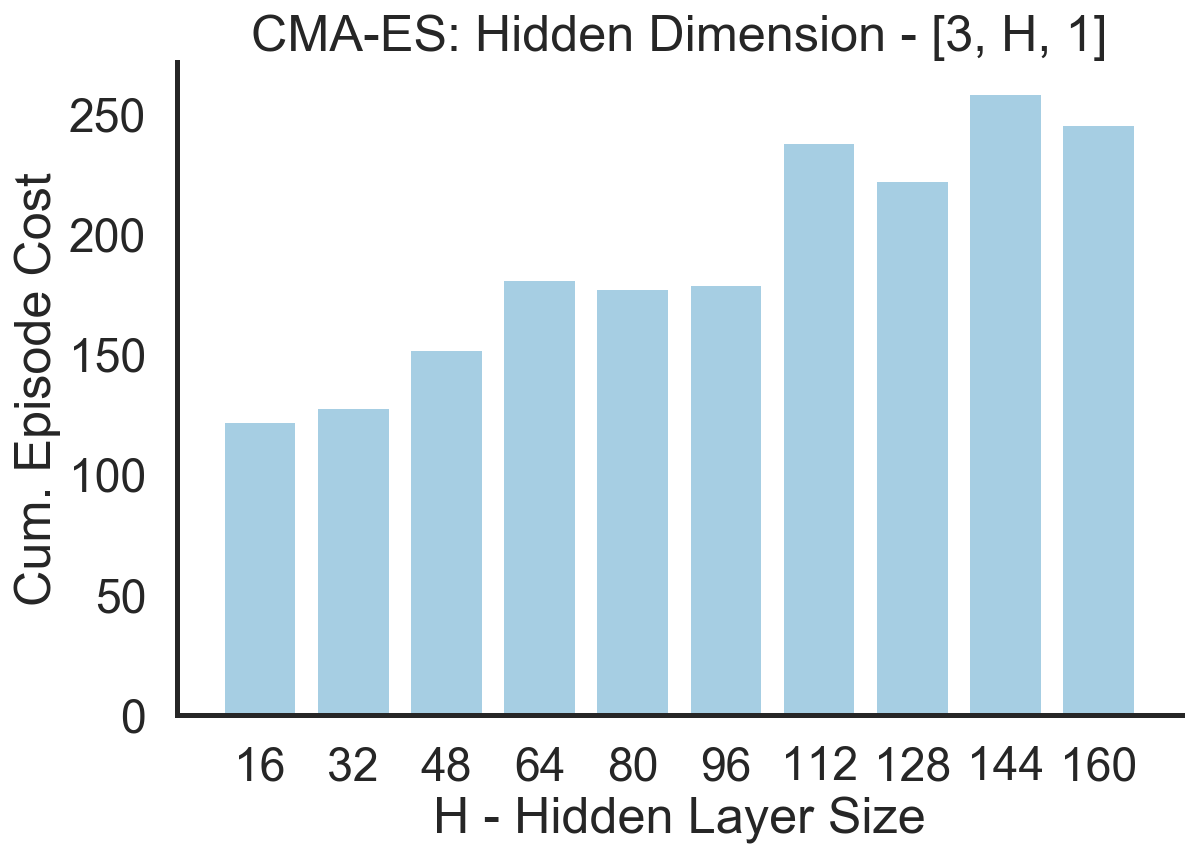

In [5]:
df_pop_hiddens = hyper_log_to_df("../examples/experiments/gridsearch/01/hyperlog.pkl")
fixed_params = None
param_to_plot = 'hidden_size'
target_to_plot = 'target'
visualize_1D_bar(df_pop_hiddens, param_to_plot, target_to_plot,
                 "CMA-ES: Hidden Dimension - [3, H, 1]",
                 ["H - Hidden Layer Size", "Cum. Episode Cost"], 1)

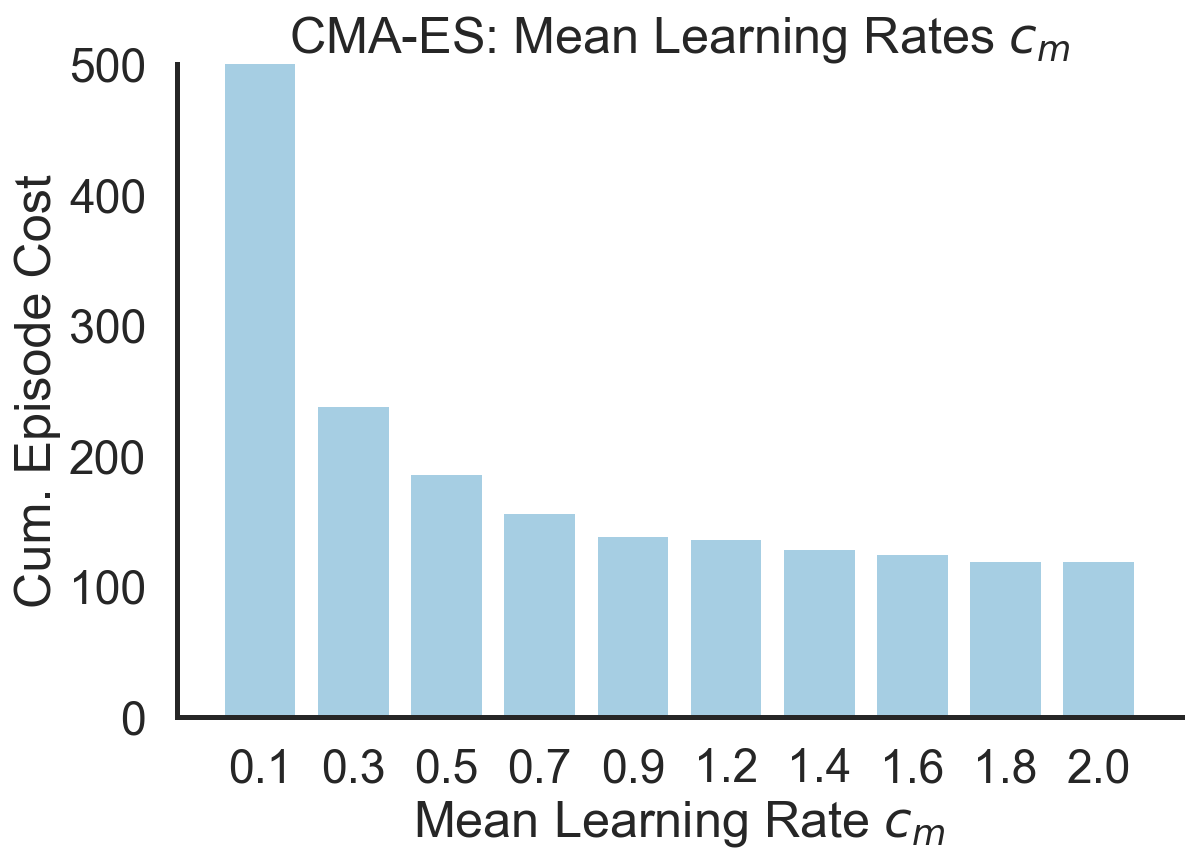

In [6]:
df_c_m = hyper_log_to_df("../examples/experiments/gridsearch/02/hyperlog.pkl")
fixed_params = None
param_to_plot = 'c_m'
target_to_plot = 'target'
visualize_1D_bar(df_c_m, param_to_plot, target_to_plot,
                 r"CMA-ES: Mean Learning Rates $c_m$",
                 [r"Mean Learning Rate $c_m$", "Cum. Episode Cost"], 1, (0, 500))

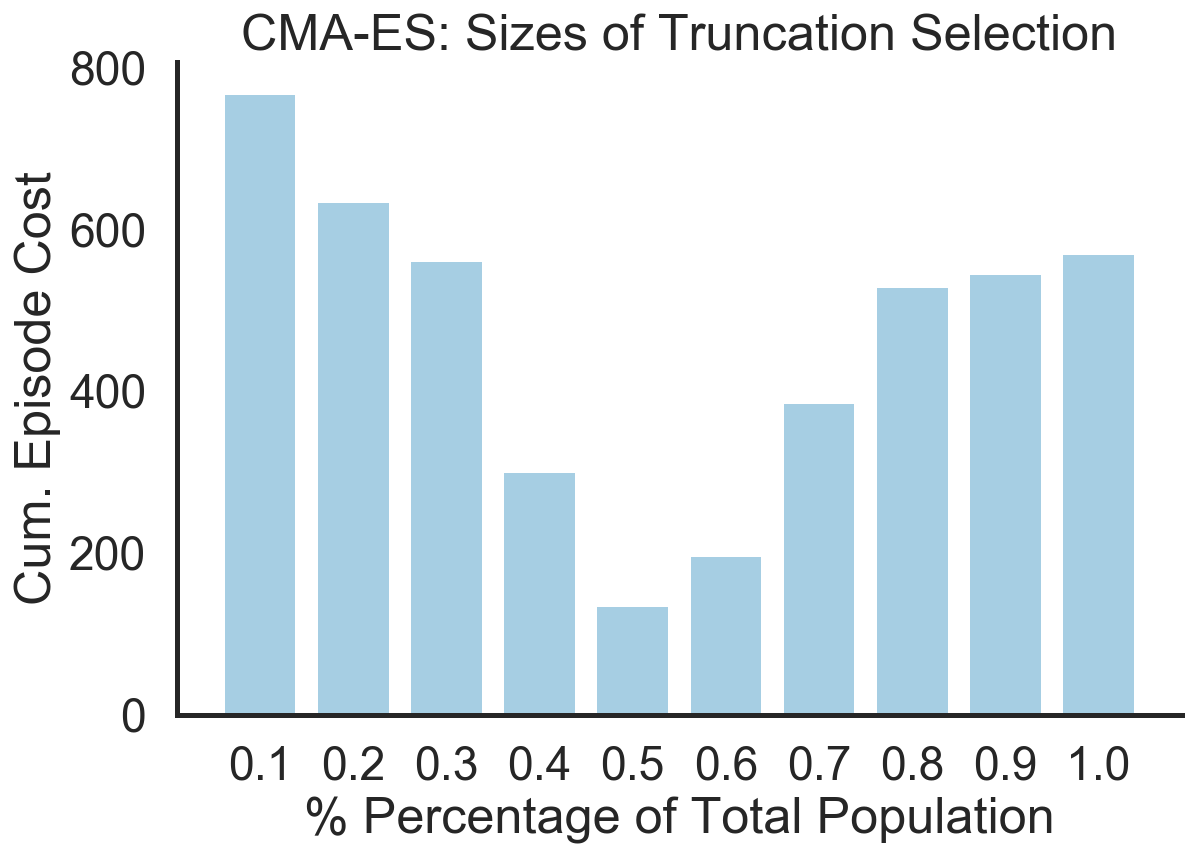

In [7]:
df_elite = hyper_log_to_df("../examples/experiments/gridsearch/03/hyperlog.pkl")
fixed_params = None
param_to_plot = 'elite_percentage'
target_to_plot = 'target'
visualize_1D_bar(df_elite, param_to_plot, target_to_plot,
                 r"CMA-ES: Sizes of Truncation Selection",
                 [r"% Percentage of Total Population", "Cum. Episode Cost"], 1)